This jupyter notebook walks through different methods to customize colorbar.
    1. Use matplotlib colorbar
    2. Use cmocean colorbars
    3. Use CPT file to import custom colorbar
    4. Use make_cmap function to customize colorbar

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from metpy.units import units
import sys
sys.path.append('../modules')
from plotter import simple_xarray_contour_map, loadCPT, simple_xarray_pcolormesh_map, make_cmap

In [2]:
# Set filepath
datdir = '../sample-data/'
filename = 'erai.mon.t2m.2000-2005.nc'
filepath = datdir + filename

# Open dataset using xarray
ds = xr.open_dataset(filepath)

# # Select data for plotting
data = ds.t2m.sel(time='2003-08-01')
data_celsius = (data - 273.15) # convert from Kelvin to Celsius
data_celsius.attrs['units'] = 'degC'
data_celsius.attrs['long_name'] = ds.t2m.attrs['long_name']

#### 1) Use Matplotlib Colobar
In python, matplotlib has a series of defined cmaps shown [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). You can easily set the cmap argument to any of these defined colorbars. If you want to reverse the colors on the cmap, simply put an `_r` after the name of the colormap.

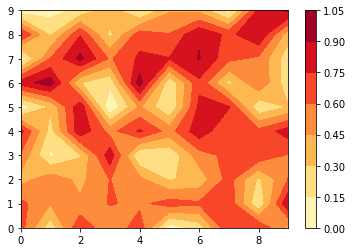

In [3]:
plt.contourf(np.random.rand(10,10),cmap='YlOrRd')
plt.colorbar()

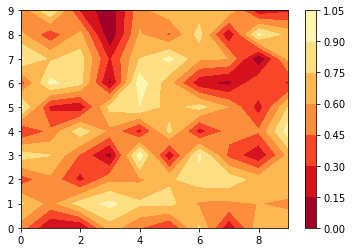

In [4]:
# Same cmap, just reversed
plt.contourf(np.random.rand(10,10),cmap='YlOrRd_r')
plt.colorbar()

Let's plot real data using our matplotlib colorbar.

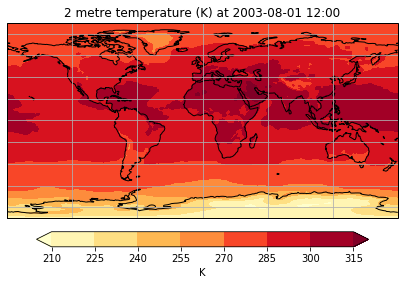

In [5]:
simple_xarray_contour_map(data, 'YlOrRd')

#### 2) Use cmocean

[Cmocean](https://matplotlib.org/cmocean/) is a python package designed for colorbars specific to oceanography. The colormaps are also useful for atmospheric sciences. [Thyng et al., 2016](http://tos.org/oceanography/assets/docs/29-3_thyng.pdf) describes the importance of choosing correct colorbars and is a useful read. Their website has a series of excellent colormap tutorials that is a great resource for other customizations.

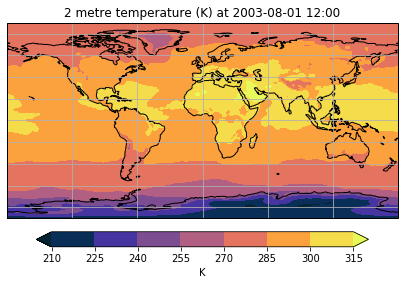

In [6]:
# using a cmocean colormap
simple_xarray_contour_map(data, cmap=cmocean.cm.thermal)

#### 3) Use CPT file for importing custom colormap
You can make your own cpt file or download some [here](http://soliton.vm.bytemark.co.uk/pub/cpt-city/). The function to import the cpt file is found in the plotter module. For this tutorial we will use the temperature cpt 

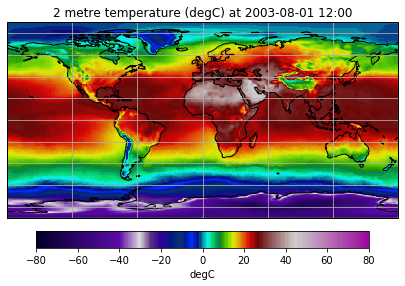

In [7]:
# Converts a CPT file to be used in Python
cpt = loadCPT('../sample-data/celsius_temp.cpt')
# CPT colorbars work best with pcolormesh (can set vmin and vmax) rather than contourf
simple_xarray_pcolormesh_map(data_celsius, cpt, vmin=-80, vmax=80)

#### 4) Make custom colormap

Last, this tutorial will show you how you can make your own colormap based on a series of RGB values and set color levels. 

In [8]:
## Colorbar ##
## based on https://ghrc.nsstc.nasa.gov/home/content/lisotd-gridded-lightning-climatology-data-collection-updated-include-last-year-trmm-lis-data
clevs = [-20., -15, -10, -6, -4, -2, 1.0, 2.0
        , 4, 6, 8, 10, 15, 20, 30, 40, 50, 70, 80]

cmap_data = [(255., 255., 255.),
             (128.,32., 136.),
             (168., 24., 176.),
             (240.,152.,240.),
             (0.,0.,144.),
             (104., 104., 200.),
             (200.,200.,224.)
             ,(32., 160.,32.),
             (112., 208., 112.),
             (176., 240., 176.),
             (224.,224.,0.),
             (232.,144.,8.),
             (200.,128.,32.),
             (192.,112.,48.),
             (208.,0.,0.),
             (160.,0.,0.),
             (56.,56.,56.),
             (168.,168.,168.)
            ]
# cmap_data
myInt = 255.0
newCmap = []
for i in np.arange(len(cmap_data)):
    newCmap.append([x / myInt for x in cmap_data[i]])
temp_cmap = mcolors.ListedColormap(newCmap, 'temp')
temp_norm = mcolors.BoundaryNorm(clevs, temp_cmap.N)

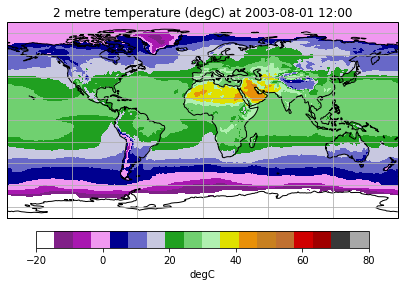

In [9]:
simple_xarray_pcolormesh_map(data_celsius, temp_cmap, vmin=-20, vmax=80)

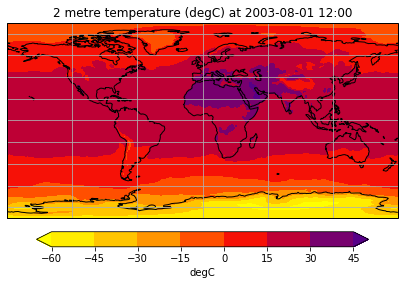

In [10]:
colors = [(255,255,0), (255, 228, 0), (255, 200, 0), 
          (255, 173, 0), (255, 130, 0), (255, 80, 0),
          (255, 30, 0), (235, 0, 16), (184, 0, 58), 
          (133,0,99), (87,0,136)]
my_cmap = make_cmap(colors, bit=True)

simple_xarray_contour_map(data_celsius, my_cmap)